In [1]:
import requests
import pandas as pd

r = requests.get("https://pomber.github.io/covid19/timeseries.json")
data = r.json()

In [2]:
# Create lists for each column
dates = []
countries = []
confirmed = []
deaths = []
recovered = []
for k, data_list in data.items():
    for d in data_list:
        dates.append(d['date'])
        countries.append(k)
        confirmed.append(d['confirmed'])
        deaths.append(d['deaths'])
        recovered.append(d['recovered'])

# Create Dataframe
df = pd.DataFrame({'date': dates, 'country': countries, 'confirmed': confirmed, 'deaths': deaths, 'recovered': recovered})

# Convert "2020-3-9" to "2020-03-09" format
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,country,confirmed,deaths,recovered
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [3]:
df['country'].unique()[:5]

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola'],
      dtype=object)

In [4]:
df[df['country'] == 'US']['confirmed'].plot()

In c:\users\vinny\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\users\vinny\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\users\vinny\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [5]:
us_df = df[df['country'] == 'US'][['confirmed','deaths','recovered']]
us_df.index = df[df['country'] == 'US']['date']
us_df.head()

,confirmed,deaths,recovered
date,,,
2020-01-22,1,0,0
2020-01-23,1,0,0
2020-01-24,2,0,0
2020-01-25,2,0,0
2020-01-26,5,0,0


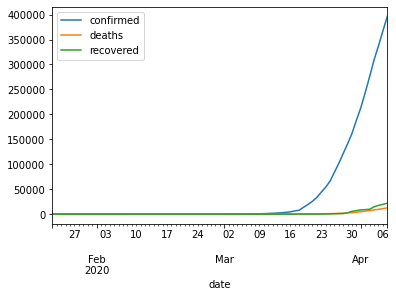

In [6]:
us_df.plot()

ValueError: Boolean, None and 'sym' are valid options, 'true' is given.

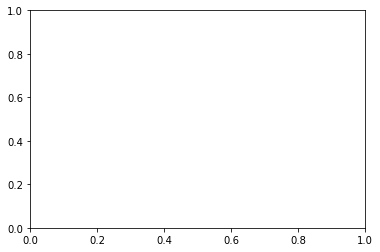

In [7]:
us_df.plot(logy= 'true')

In [ ]:
us_df.columns

In [ ]:
for col in us_df.columns:
#     cum_col = 'cumulative_' + col
#     us_df[cum_col] = us_df[col].cumsum()
    new_col = 'new_' + col
    us_df[new_col] = us_df[col] - us_df[col].shift(1).fillna(0)
us_df = us_df.fillna(0)

us_df.head()

In [ ]:
us_df.plot(x='confirmed', y='new_confirmed', logx='true', logy= 'true')